# IBM Cloud Deployment and Model Training

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

# ImageDataGenerator for training and testing set
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

## Streaming_body file creation for Dataset.zip

In [15]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rMBRgNFXwXezbiWK1ayktQBtwV63spNK1_EQ6HAYC5NH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationforspecially-donotdelete-pr-uxsxyvos3t7znk'
object_key = 'Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [16]:
from io import BytesIO
from zipfile import ZipFile

In [17]:
unzip = ZipFile(BytesIO(streaming_body_1.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [18]:
pwd

'/home/wsuser/work'

In [19]:
import os
filenames = os.listdir('/home/wsuser/work/Dataset/training_set')

In [20]:
training_data = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/training_set',
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  batch_size=100, color_mode='grayscale')

testing_data = test_datagen.flow_from_directory('/home/wsuser/work/Dataset/test_set',
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  batch_size=100, color_mode='grayscale')


Found 29345 images belonging to 26 classes.
Found 2600 images belonging to 26 classes.


In [21]:
training_data.class_indices #All categories in training data

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [22]:
testing_data.class_indices # All categories in testing data

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

In [24]:
#### Initialize the model, Add convolution layer, pooling layer, flatten layer, dense layer
model = Sequential() # Sequential Model

model.add(Conv2D(128, (3,3), activation='relu', input_shape=(128,128,1))) # Convolution Layer
model.add(MaxPooling2D(pool_size=(2,2))) # Pooling Layer

model.add(Conv2D(128, (3,3), activation='relu')) # Convolution Layer
model.add(MaxPooling2D(pool_size=(2,2))) # Pooling Layer

model.add(Flatten()) # Flatten Layer
model.add(Dense(128, activation='relu')) # Hidden Layer
model.add(Dense(128, activation='relu')) # Hidden Layer
model.add(Dense(26, activation='softmax')) # Hidden Layer

In [25]:
#### Compiler the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#### Fit the model
model.fit_generator(training_data,
                    steps_per_epoch=len(training_data),
                    epochs=3,
                    validation_data=testing_data,
                    validation_steps=len(testing_data))

In [60]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rMBRgNFXwXezbiWK1ayktQBtwV63spNK1_EQ6HAYC5NH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationforspecially-donotdelete-pr-uxsxyvos3t7znk'
object_key = 'trained_model.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [61]:
unzip = ZipFile(BytesIO(streaming_body_4.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [ ]:
#### Save the model
model.save('trained_model.h5')

In [65]:
# Testing The Model
### Making necessary imports
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import cv2

In [66]:
### Load the Trained Model
model = load_model('/home/wsuser/work/trained_model.h5')


In [67]:
def get_prediction(num):
  out = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K',
         11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V',
         22:'W', 23:'X', 24:'Y', 25:'Z'}
  return out[num]

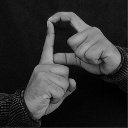

In [68]:
### Predicting Test Images
#### Indian Sign Language(ISL) Alphabet - 'D'
img = image.load_img('/home/wsuser/work/Dataset/test_set/D/1027.jpg', target_size=(128,128), color_mode='grayscale')
img

In [69]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
prediction = np.argmax(model.predict(x))
get_prediction(prediction)

'D'

In [70]:
model.save('trained_model.h5')

In [71]:
!tar -zcvf image-classification-model.tgz trained_model.h5

trained_model.h5


In [72]:
ls -1

Dataset/
image-classification-model.tgz
trained_model.h5


# Watson Machine Learning Client

In [73]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 23.1 MB/s eta 0:00:01


# Creating API key

In [74]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "yGcontWQ4_nZpsyJWxgO3jVEYLAh13yvR0RAFHdXVq-X"
}
client = APIClient(wml_credentials)

In [77]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

# Creating a new deployment named "imageclassification" and using it in method

In [78]:
space_uid = guid_from_space_name(client, 'imageclassification')
print("Space UID = " + space_uid)

Space UID = 85e08b0a-397f-4ec0-9474-fd98c2e8c4fb


# Assiging 'imageclassification' deployment as default client space

In [79]:
client.set.default_space(space_uid)

'SUCCESS'

In [80]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [91]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

# Deploying our model into 'imageclassification' deployment space

In [93]:
model_details = client.repository.store_model(model='image-classification-model.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [94]:
model_id

'd0bd66c9-8554-4903-a6a6-6814ca6365c0'

# Saving our deployed model

In [95]:
client.repository.download(model_id, 'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'